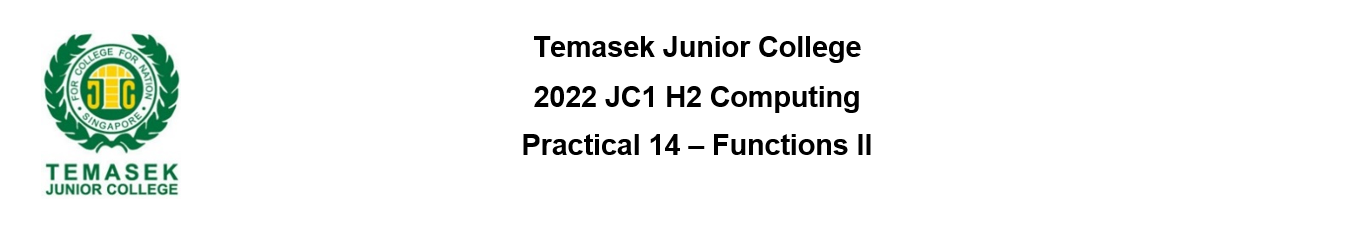

## 14.1 Using Functions and Modules in IDLE

* In Python programming, it is common to put one or more functions in a file, which is called a Python **module**. 


* All python files have the extension **.py**.


* We will use **IDLE** for this section to get familiar with **modules**.

### 14.1.1 IDLE Working Directory

* Recall that when IDLE starts, it presents a REPL window (Read-Evaluate-Print-Loop), which is similar to how you run Python using the command line. 


* All command lines have a current working directory. 


* To get and set current working directory of IDLE, we need the help of `os` module.

    * `os.getcwd()` returns the current working directory
    * `os.chdir()` changes the current working directory


* Start IDLE and try following:
    * Find out IDLE's current working directory
    * Change the working directory to `"C:\\"` or whichever working directory that you plan to place your modules in

        * `import os`

        * `os.getcwd()`

        * `os.chdir('C:\\')`

        * `os.getcwd()`

### 14.1.2 Creating a New Module

* Create a new Python file from IDLE using `File > New File`.

* Add the following two functions to the file.

```python
def hello_once(name):
    print('Hello {}'.format(name))

def hello_many(items):
    for item in items:
        hello_once(item)
```

* Save the file as `myhello.py`.
* Press `F5` to run the module.


**Question:** What the current working directory of IDLE now?

* IDLE automatically changes the working directory to the folder containing the script which is being run.

### 14.1.3 Importing a Module in IDLE 

* To import `myhello.py` module, use `import` statement without `.py` extension.

    `import myhello`


* After importing, we can use the functions from the module.


* To call the function in the module, prefix the function by the module name.

    `myhello.hello_once("World")`
    
    `myhello.hello_many(["World", "Python"])`
    
* You may do import the module `myhello` in the REPL, or you may create a new Python file and import the module from your Python file too, as long as the file `myhello.py` is in the same working directory as your Python file.

### 14.1.4 Re-Importing a Module after Modification


* Modify the `hello_once` function in `myhello.py` file with following content. 


* Save the file.

```
def hello_once(name):
    print('Hello again {}'.format(name))
```

* Import the module again.

    `import myhello`
    

* Run `hello_once()` function again.

    `myhello.hello_once('World')`
    
**Question:** Does the output reflect the code changes?

### 14.1.5 Reloading Imported Module

* For each Python REPL session, module importing is only done once. 


* To re-import a module, we need the help of `importlib` module.


* Upon import, the code in module is executed

    `import importlib`

    `importlib.reload(myhello)`

    `myhello.hello_once('World')`
    
    
* If you import the module from a Python file, the module importing will be done when you run the Python  file, so you do not need to do these steps

## 14.2 Module Import vs. Module Execution

* We will use the **Command Prompt** or **Powershell** for this section to get familiar with the content.

### 14.2.1 Module Execution

* Python files can be executed directly using Python executable on the command line. 
    * Start a Windows Command Prompt or PowerShell (or Terminal on Mac OS)
    * Go to folder containing `myhello.py`
    * Run following command to execute the module

```
$ python myhello.py
```

* Append following line to the end of `myhello.py` file. (Without any leading space on the line)

```
hello_many(["World", "Python"])
```

* Execute the module again. Following are the printouts.

```
Hello again World
Hello again Python
```

### 14.2.2 Module Import

Let's try to import `myhello` module again.

* On Command Prompt or PowerShell, start a Python REPL session by executing `python`.


* Import `myhello` module. 
    * Since this is a new Python REPL session, we dont need the help of `importlib`.
    
    
* **Question:** Is the module executed during import too?


Modules will be executed once during import. We would not like the above printout when a module is imported in another module.

**Question:** How can we make a module suitable for both **execution** and **import**? 

### 14.2.3 The \_\_name\_\_ Variable (Advanced)

Special attributes/variables in Python are enclosed by **double underscores**, e.g. `__name__`.

The `__name__` variable will have different value depending on how an enclosing module is used.
* It will be evaluated to `"__main__"` if the module is executed.
* It will be evaluated to module name if the module is imported.

* Append following line in `myhello.py` file.

```
print('The __name__ is', __name__)
```

* Press CTRL+z (on Windows) to exit from Python REPL.
* Run following command to execute the module. What is the value of `__name__`?

```
$ python myhello.py
```

* Start Python REPL by typing `python`.
* Import `myhello` module. What is the value of `__name__`?

### 14.2.4 Using the \_\_name\_\_ Variable in Modules (Advanced)

We can make use of __name__ variable to support both **module import** and **module execution**.

In your `myhello.py` file, following are the 2 last lines of code. 

```
hello_many(["World", "Python"])
print('The __name__ is', __name__)
```

Modify it to following code. 

```
if __name__ == '__main__':
    hello_many(["World", "Python"])
```

Try to execute and import `myhello` module again.
* Press CTRL+z to exit Python REPL
* Run `python myhello.py`
* Start Python REPL by running `pyhton`
* Import `myhello` module

**Question:** how does `__name__` make a difference?


* It's a common practice to include a `if __name__ == '__main__':` session in python script so that it can be used for both module execution and module import.

## 14.3 More on Importing Modules

There are several options to import a module.

* Import module and access functions through module
```
import myhello
```

* Import specific functions from module
```
from myhello import hello_once, hello_many
```

* Imoprt everything from a module
```
from myhello import *
```

Last option NOT recommended because you do not have a control on what is imported. It may potentially cause **namespace collashes**, if the imported module contains functions of same name as your own functions.  

## 14.4 Command Line Arguments (Advanced)

When executing a python file, we may want to pass it some arguments, which is called **Command Line Arguments**.

To get the list of arguments passed to the script, we use `sys.argv` in `sys` module. 
* `sys.argv` is the list of command-line arguments.
* `len(sys.argv)` is the number of command-line arguments.
* `sys.argv[0]` is the script name.

**Question:**
How to get a list of all arguments excluding script name? 


Let's use them in our `myhello` module.

* Modify the `__main__` code block in `myhello.py` file as following 
```
import sys
if __name__ == '__main__':
        print("Script name: {}".format(sys.argv[0]))
        if len(sys.argv) == 2:
                hello_once(sys.argv[1])
        if len(sys.argv) > 2: 
                hello_many(sys.argv[1:])
```

* On Command Prompt or PowerShell, run following commands
```
$ python myhello.py
$ python myhello.py World
$ python myhello.py World Python
```

**(Optional) Named Command Line Arguments**

If multple arguments to be passed to a script, it is less confusing if user can specify the name of each argument. Example, `python myhello.py --whom World`.

It's common to use named command arguments while executing scripts. To implement it, check out `argparse` module.

You may visit https://stackoverflow.com/questions/40001892/reading-named-command-arguments to find out more.

## 14.5 Docstrings

The first string after the function header is called **documentation string**, which is commonly called **docstring**. 

Docstring serves as documentation for your function so that anyone who reads the function’s docstring understands what the function does, without having to trace through all the code in the function definition.

* It is used to explain briefly what a function does.
* It is optional but highly recommended.
* It can be single-line or multiple-lines. It is common to use **triple quotes** which is capable of defining multi-line string.

### 14.5.1 Adding a Docstring

**Example 1**
* Modify the `myhello.py` file by adding Docstring for both module and functions.
* Module docstring must start at 1st line of the file.
* Function docstring must start immediately afte `def` statement

In [ ]:
'''
My first module in Python.
It contains a few classic hello-world functions.
'''

def hello_once(name):
    '''Say hello once
    
    Args: 
        A string containing the name
    '''
    print('Hello again {}'.format(name))

def hello_many(items):
    '''Say hello multiple times

    Args: 
        A list of names
    '''
    for item in items:
        hello_once(item)

import sys
if __name__ == '__main__':
    print("Script name: {}".format(sys.argv[0]))
    if len(sys.argv) == 2:
        hello_once(sys.argv[1])
    if len(sys.argv) > 2:
        hello_many(sys.argv[1:])

### 14.5.2 Accessing a Docstring

Docstring of a function or class can be accessed using the `help()` function or `__doc__` attribute of the function or class.

* Start a Python REPL
* Import `myhello` module

`$ import myhello`  


* Print docstring of module and function

```
$ print(myhello.__doc__)
$ help(myhello)
$ print(myhello.hello_many.__doc__)
$ help(myhello.hello_many)
```

## Tutorial

**Question 1**

To find all factors of a positive integer n , iterate through integers between 1 and n (both inclusive) to find collect all numbers which can divide n .
Implement a function `list_factors()` which takes in a positive integer, and returns a list of its factors.


In [2]:
# Enter your code here



Test Case 1

Expected output: `[1]`

In [ ]:
list_factors(1)

Test Case 2

Expected output: `[1, 3, 5, 15]`

In [ ]:
list_factors(15)

Test Case 3

Expected output: `[1, 97]`

In [ ]:
list_factors(97)

**Question 2**

Implement a function `consecutive_diff()` which takes in a list `s` . It returns a list of numbers, which are the absolute difference of 2 consecutive elements in the list.

Hint: Use `abs()` to get absolute value of a number.

In [ ]:
# Enter your code here



Test Case 1


Expected output: `[2, 6, 1, 2]`


In [ ]:
consecutive_diff([1,3,9,8,6])